#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 09
**CH09A Estimating gender and age differences in earnings**

using the cps-earnings dataset

version 0.9.0 2025-08-14

In [1]:
import os
import sys
import warnings
import pyfixest as pf
import numpy as np
import pandas as pd
import statsmodels.nonparametric.kernel_regression as loess
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/cps-earnings/clean/"
data_out = dirname + "da_case_studies/ch09-gender-age-earnings/"
output = dirname + "da_case_studies/ch09-gender-age-earnings/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:
# Import the prewritten helper functions
import da_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)

In [4]:
#data_all = pd.read_csv(data_in + "morg-2014-emp.csv")
data_all = pd.read_csv("https://osf.io/download/4ay9x/")



### SELECT OCCUPATION

keep only two occupation types: Market research analysts and marketing specialists and Computer and Mathematical Occupations

In [5]:
data_all.loc[data_all["occ2012"] == 735, "sample"] = 1
data_all.loc[
    ((data_all["occ2012"] >= 1005) & (data_all["occ2012"] <= 1240)), "sample"
] = 2
data_all.loc[data_all["sample"].isna(), "sample"] = 0


In [6]:
data_all = data_all.loc[
    (data_all["sample"] == 1) | (data_all["sample"] == 2), :
].reset_index(drop=True)


In [7]:
data_all["sample"].value_counts()


sample
2.0    4740
1.0     281
Name: count, dtype: int64

In [8]:
data_all["female"] = (data_all["sex"] == 2).astype(int)
data_all["w"] = data_all["earnwke"] / data_all["uhours"]
data_all["lnw"] = np.log(data_all["w"])
data_all["agesq"] = np.power(data_all["age"], 2)


In [9]:
i = 1
data = data_all.loc[data_all["sample"] == i, :].reset_index(drop=True)
data.to_csv(data_out + "earnings_inference.csv", index=False)


### DISTRIBUTION OF EARNINGS

In [10]:
data.loc[:, ["earnwke", "uhours", "w"]].describe()

,earnwke,uhours,w
count,281.000000,281.000000,281.000000
mean,1206.186940,40.153025,29.061656
std,709.545222,10.325838,14.712495
min,40.000000,5.000000,7.250000
25%,700.000000,40.000000,17.788250
50%,1096.150000,40.000000,25.950000
75%,1538.000000,40.000000,37.019000
max,2884.610000,80.000000,84.600000


In [11]:
data.loc[data["w"] >= 1, ["earnwke", "uhours", "w"]].describe()


,earnwke,uhours,w
count,281.000000,281.000000,281.000000
mean,1206.186940,40.153025,29.061656
std,709.545222,10.325838,14.712495
min,40.000000,5.000000,7.250000
25%,700.000000,40.000000,17.788250
50%,1096.150000,40.000000,25.950000
75%,1538.000000,40.000000,37.019000
max,2884.610000,80.000000,84.600000


In [12]:
data["female"].value_counts()


female
1    172
0    109
Name: count, dtype: int64

In [13]:
data.groupby(["occ2012", "female"]).size()


occ2012  female
735      0         109
         1         172
dtype: int64

### Linear regressions

In [14]:
reg1 = pf.feols("lnw~female", data=data)
pf.etable(reg1)

GT(_tbl_data=  level_0             level_1                      0
0    coef              female    -0.113 <br> (0.061)
1    coef           Intercept  3.315*** <br> (0.048)
2   stats        Observations                    281
3   stats           S.E. type                    iid
4   stats       R<sup>2</sup>                  0.012
5   stats  Adj. R<sup>2</sup>                  0.008, _body=<great_tables._gt_data.Body object at 0x00000262BB5B6420>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000262BB5B54C0>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000262BB5B5A30>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='

In [15]:
reg2 = pf.feols("lnw~female", data=data,vcov="HC1")
pf.etable(reg2)

GT(_tbl_data=  level_0             level_1                      0
0    coef              female    -0.113 <br> (0.062)
1    coef           Intercept  3.315*** <br> (0.049)
2   stats        Observations                    281
3   stats           S.E. type                 hetero
4   stats       R<sup>2</sup>                  0.012
5   stats  Adj. R<sup>2</sup>                  0.008, _body=<great_tables._gt_data.Body object at 0x00000262BB5B5DC0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000262BB5AF740>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000262BB5AFA40>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='

### Table 9.1 Wage and gender gap baseline regression

In [16]:
pf.etable([reg1,reg2],
          labels={"Intercept":"Constant"})

GT(_tbl_data=  level_0             level_1                      0                      1
0    coef              female    -0.113 <br> (0.061)    -0.113 <br> (0.062)
1    coef            Constant  3.315*** <br> (0.048)  3.315*** <br> (0.049)
2   stats        Observations                    281                    281
3   stats           S.E. type                    iid                 hetero
4   stats       R<sup>2</sup>                  0.012                  0.012
5   stats  Adj. R<sup>2</sup>                  0.008                  0.008, _body=<great_tables._gt_data.Body object at 0x00000262BB5ADBE0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000262BB5AD5B0>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000262BB5AD8E0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px

In [17]:
reg3 = pf.feols("lnw~age", data=data,vcov="HC1")
pf.etable(reg3)

GT(_tbl_data=  level_0             level_1                      0
0    coef                 age  0.014*** <br> (0.003)
1    coef           Intercept  2.732*** <br> (0.101)
2   stats        Observations                    281
3   stats           S.E. type                 hetero
4   stats       R<sup>2</sup>                  0.098
5   stats  Adj. R<sup>2</sup>                  0.095, _body=<great_tables._gt_data.Body object at 0x00000262BB59FCB0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000262BB59D280>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000262BB59C050>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='

In [18]:
reg4 = pf.feols("lnw~age+agesq", data=data,vcov="HC1")
pf.etable(reg4)

GT(_tbl_data=  level_0             level_1                       0
0    coef                 age   0.096*** <br> (0.018)
1    coef               agesq  -0.001*** <br> (0.000)
2    coef           Intercept   1.193*** <br> (0.341)
3   stats        Observations                     281
4   stats           S.E. type                  hetero
5   stats       R<sup>2</sup>                   0.168
6   stats  Adj. R<sup>2</sup>                   0.163, _body=<great_tables._gt_data.Body object at 0x00000262BB466780>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000262BB466D50>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000262BB466B40>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_bord

In [19]:
from da_helper_functions import lspline

In [20]:
reg5 = pf.feols("lnw~lspline(age,[30,40])", data=data,vcov="HC1",context=0)
pf.etable(reg5)

GT(_tbl_data=  level_0                    level_1                      0
0    coef  lspline(age, [30, 40])[0]  0.062*** <br> (0.014)
1    coef  lspline(age, [30, 40])[1]     0.017 <br> (0.010)
2    coef  lspline(age, [30, 40])[2]    -0.003 <br> (0.006)
3    coef                  Intercept  1.383*** <br> (0.369)
4   stats               Observations                    281
5   stats                  S.E. type                 hetero
6   stats              R<sup>2</sup>                  0.173
7   stats         Adj. R<sup>2</sup>                  0.164, _body=<great_tables._gt_data.Body object at 0x00000262BB467C50>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000262BB464770>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000262BB464530>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8

In [21]:
reg6 = loess.KernelReg(data["lnw"], data["age"], var_type="c", reg_type="lc")

In [22]:
reg6

KernelReg instance
Number of variables: k_vars = 1
Number of samples:   N = 281
Variable types:      c
BW selection method: cv_ls
Estimator type: lc

### Table 9.2 Wage and age – different specifications

In [ ]:
pf.etable([reg3,reg4,reg5],
          labels={
        "Intercept": "Constant",
        "agesq": "age squared",
        "lspline(age, [30, 40])[0]": "age spline <30",
        "lspline(age, [30, 40])[1]": "age spline 30-40",
        "lspline(age, [30, 40])[2]": "age spline 40<",
    }
)

GT(_tbl_data=  level_0             level_1                      0                       1  \
0    coef                 age  0.014*** <br> (0.003)   0.096*** <br> (0.018)   
1    coef         age squared                         -0.001*** <br> (0.000)   
2    coef      age spline <30                                                  
3    coef    age spline 30–40                                                  
4    coef      age spline 40<                                                  
5    coef            Constant  2.732*** <br> (0.101)   1.193*** <br> (0.341)   
6   stats        Observations                    281                     281   
7   stats           S.E. type                 hetero                  hetero   
8   stats       R<sup>2</sup>                  0.098                   0.168   
9   stats  Adj. R<sup>2</sup>                  0.095                   0.163   

                       2  
0                         
1                         
2  0.062*** <br> (0.014)  
3     0.017 <br> (0.010)  
4    -0.003 <br> (0.006)  
5  1.383*** <br> (0.369)  
6                    281  
7                 hetero  
8                  0.173  
9                  0.164  , _body=<great_tables._gt_data.Body object at 0x00000262BB4EF7A0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000262BB4EE180>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000262BB4ED670>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type=

### Figure 9.3 Log hourly wage and age: regressions that capture nonlinearity

(a) Lowess regression and scatterplot

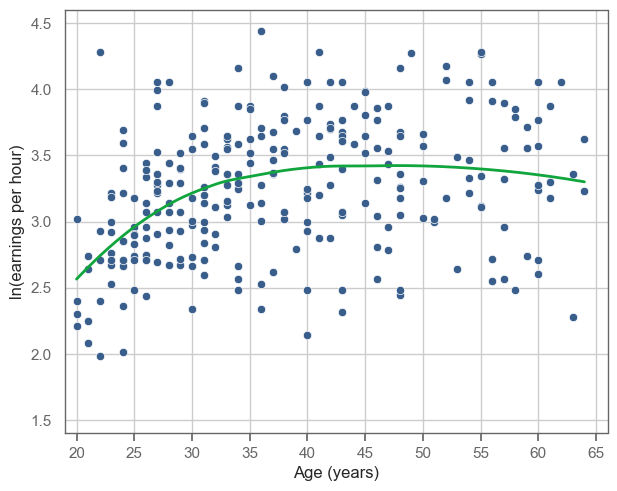

In [24]:
sns.scatterplot(data=data, x="age", y="lnw")
da.plot_loess(data=data, x="age", y="lnw",span=0.8,color=da.color[1])
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("ln(earnings per hour)", fontsize=12)
plt.xlim(19, 66)
plt.xticks(np.arange(20, 66, 5))  
plt.ylim(1.4, 4.6)
plt.yticks(np.arange(1.5, 4.6, 0.5))  


plt.show()

In [25]:
pf.etable(reg4)

GT(_tbl_data=  level_0             level_1                       0
0    coef                 age   0.096*** <br> (0.018)
1    coef               agesq  -0.001*** <br> (0.000)
2    coef           Intercept   1.193*** <br> (0.341)
3   stats        Observations                     281
4   stats           S.E. type                  hetero
5   stats       R<sup>2</sup>                   0.168
6   stats  Adj. R<sup>2</sup>                   0.163, _body=<great_tables._gt_data.Body object at 0x00000262BB4E4650>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000262BB309AF0>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000262BB30AB40>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_bord

In [26]:
z = reg4.predict(interval="prediction")

In [27]:
data["lnwpred_ageq"] = z["fit"]
data["lnwpred_ageqCIUP"] = z["fit"] + 1.95 * z["se_fit"]
data["lnwpred_ageqCILO"] = z["fit"] - 1.95 * z["se_fit"]


In [28]:
z = reg5.predict(interval="prediction")


In [29]:
data["lnwpred_agesp"] = z["fit"]
data["lnwpred_agespCIUP"] = z["fit"] + 1.95 * z["se_fit"]
data["lnwpred_agespCILO"] = z["fit"] - 1.95 * z["se_fit"]


In [30]:
data["lnwpred_agel"] = reg6.fit()[0]


(b) Lowess, piecewise linear spline, and quadratic

In [31]:
plotdata = data.filter(["age", "lnwpred_agel", "lnwpred_ageq", "lnwpred_agesp"]).melt(
    id_vars=["age"]
)

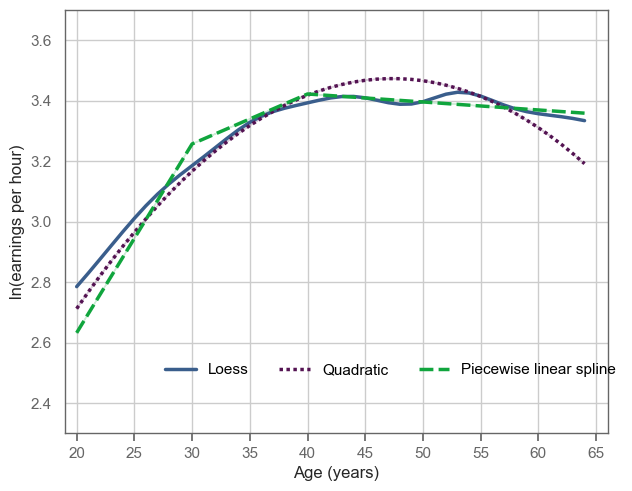

In [32]:
palette = {
    "lnwpred_agel": da.color[0],
    "lnwpred_ageq": da.color[2],
    "lnwpred_agesp": da.color[1]
}
legend_labels = {
    "lnwpred_agel": "Loess",
    "lnwpred_ageq": "Quadratic",
    "lnwpred_agesp": "Piecewise linear spline"
}

sns.lineplot(
    data=plotdata,
    x="age",
    y="value",
    hue="variable",
    style="variable",
    palette=palette,
    style_order=["lnwpred_agel","lnwpred_agesp","lnwpred_ageq"],
    linewidth=2.5
)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
plt.legend(
    handles=handles[:len(new_labels)],
    labels=new_labels,
    title="",
    loc="lower center",
    bbox_to_anchor=(0.6, 0.1),
    ncol=3,
    frameon=False
)

plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("ln(earnings per hour)", fontsize=12)
plt.xlim(19, 66)
plt.xticks(np.arange(20, 66, 5))  
plt.ylim(2.3, 3.7)
plt.yticks(np.arange(2.4, 3.7, 0.2))  

plt.show()

### Figure 9.4 Average log earnings and age: regressions with CI

In [33]:
plotdata = (
    data.filter(
        [
            "age",
            "lnwpred_agel",
            "lnwpred_ageq",
            "lnwpred_agesp",
            "lnwpred_ageqCIUP",
            "lnwpred_ageqCILO",
            "lnwpred_agespCIUP",
            "lnwpred_agespCILO",
        ]
    )
    .melt(id_vars=["age"])
    .assign(CI=lambda x: x["variable"].str.contains("CI"))
    .assign(
        estimate=lambda x: np.where(x["CI"], x["variable"].str[:-4], x["variable"]),
    )
)

In [34]:
# This is for filling the area between the lines
plotdata_no_duplicates = (
    plotdata
    .groupby(["age", "estimate", "CI","variable"], as_index=False)
    .agg({"value": "mean"})
)

# We need the data in wide format because of how plt.fill_between works
plotdata_wide = plotdata_no_duplicates.pivot(
    index=["age"],
    columns="variable",
    values="value"
).reset_index()


In [35]:
plotdata_wide.head()

variable,age,lnwpred_agel,lnwpred_ageq,lnwpred_ageqCILO,lnwpred_ageqCIUP,lnwpred_agesp,lnwpred_agespCILO,lnwpred_agespCIUP
0,20,2.784655,2.711840,2.560458,2.863222,2.632043,2.436127,2.827958
1,21,2.828932,2.766423,2.630592,2.902254,2.694477,2.522860,2.866094
2,22,2.874459,2.818974,2.697497,2.940450,2.756911,2.608762,2.905061
3,23,2.920481,2.869493,2.761085,2.977900,2.819346,2.693368,2.945324
4,24,2.966141,2.917980,2.821243,3.014717,2.881780,2.775861,2.987700


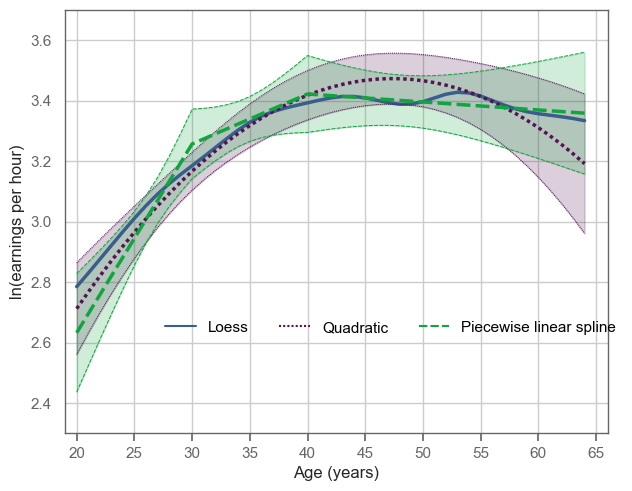

In [36]:
palette = {
    "lnwpred_agel": da.color[0],
    "lnwpred_ageq": da.color[2],
    "lnwpred_agesp": da.color[1]
}

legend_labels = {
    "lnwpred_agel": "Loess",
    "lnwpred_ageq": "Quadratic",
    "lnwpred_agesp": "Piecewise linear spline"
}

sns.lineplot(
    data=plotdata,
    x="age",
    y="value",
    hue="estimate",
    style="estimate",
    size="CI",
    palette=palette,
    style_order=["lnwpred_agel","lnwpred_agesp","lnwpred_ageq"],
    sizes={False: 2.5, True: 0.7},
    linewidth=1.5,
    units="variable",
    estimator=None
)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
plt.legend(
    handles=handles[1:len(new_labels)+ 1],
    labels=new_labels,
    title="",
    loc="lower center",
    bbox_to_anchor=(0.6, 0.2),
    ncol=3,
    frameon=False
)
plt.fill_between(
    plotdata_wide["age"],
    plotdata_wide["lnwpred_ageqCILO"],
    plotdata_wide["lnwpred_ageqCIUP"],
    color=da.color[2],
    alpha=0.2,
)

plt.fill_between(
    plotdata_wide["age"],
    plotdata_wide["lnwpred_agespCILO"],
    plotdata_wide["lnwpred_agespCIUP"],
    color=da.color[1],
    alpha=0.2,
)

plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("ln(earnings per hour)", fontsize=12)
plt.xlim(19, 66)
plt.xticks(np.arange(20, 66, 5))  
plt.ylim(2.3, 3.7)
plt.yticks(np.arange(2.4, 3.7, 0.2))  
plt.show()

### Figure 9.2 Log hourly wage and age: regression line, confidence interval, prediction interval.

In [37]:
reg7 = pf.feols("lnw~age", data=data.loc[data["sample"] == 1])

(a) Confidence interval

In [38]:
z = reg7.predict(interval="prediction")

In [39]:
interval_data = data.join(
    pd.DataFrame(reg7.predict(interval="prediction")["ci_high"].rename("pi_high"))
).join(
    reg7.predict(interval="prediction")["ci_low"].rename("pi_low")
)

In [40]:
interval_data["ci_low"] = z["fit"] - 1.95 * z["se_fit"]
interval_data["ci_up"] = z["fit"] + 1.95 * z["se_fit"]

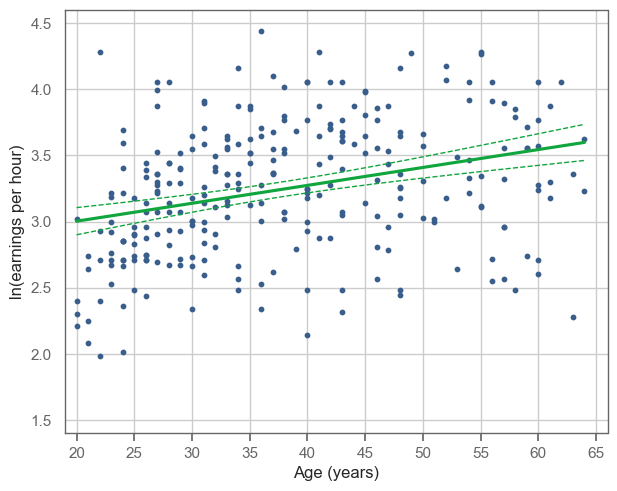

In [41]:
sns.regplot(data=interval_data, x="age", y="lnw",ci=False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 10))
sns.lineplot(data=interval_data, x="age", y="ci_low",ci=False,estimator=None,linestyle = "dashed",linewidth = 1,color = da.color[1])
sns.lineplot(data=interval_data, x="age", y="ci_up",ci=False,estimator=None,linestyle = "dashed",linewidth = 1,color = da.color[1])
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("ln(earnings per hour)", fontsize=12)
plt.xlim(19, 66)
plt.xticks(np.arange(20, 66, 5))  
plt.ylim(1.4, 4.6)
plt.yticks(np.arange(1.5, 4.6, 0.5))  
plt.show()

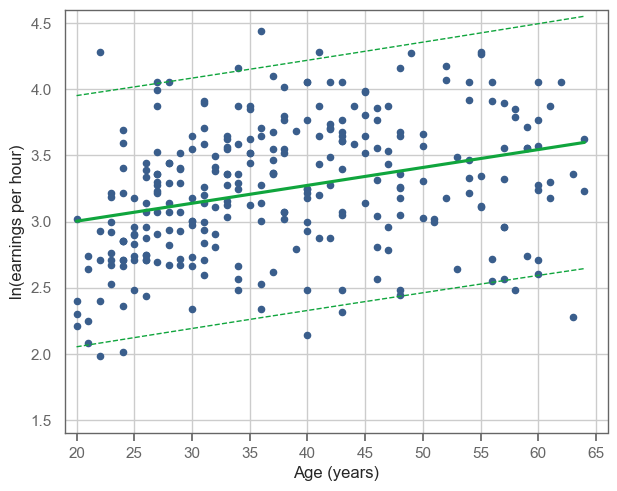

In [42]:
sns.regplot(data=interval_data, x="age", y="lnw",ci=False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 20))
sns.lineplot(data=interval_data, x="age", y="pi_high",ci=False,estimator=None,linestyle = "dashed",linewidth = 1,color = da.color[1])
sns.lineplot(data=interval_data, x="age", y="pi_low",ci=False,estimator=None,linestyle = "dashed",linewidth = 1,color = da.color[1])
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("ln(earnings per hour)", fontsize=12)
plt.xlim(19, 66)
plt.xticks(np.arange(20, 66, 5))  
plt.ylim(1.4, 4.6)
plt.yticks(np.arange(1.5, 4.6, 0.5))  
plt.show()

### Figure 9.1 Bootstrap distribution of the average female–male wage difference among market analysts

In [43]:
data = pd.read_csv(data_out + "earnings_inference.csv")


In [44]:
results = da.bs_linreg(data.lnw.values, data.female.values, size=1000)

b_earnings_female = pd.DataFrame(results).T

b_earnings_female.columns = ["_b_intercept", "_b_female"]


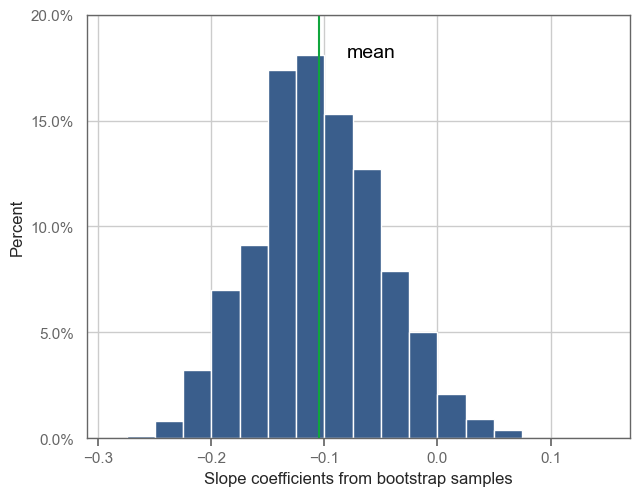

In [45]:
mean_management = b_earnings_female["_b_female"].mean()
sns.histplot(
    data=b_earnings_female,
    x="_b_female",
    binwidth=0.025,  
    binrange=(-0.3,0.1),
    color=da.color[0],
    edgecolor="white",
    stat="probability",  
    alpha=1,
)
plt.plot([mean_management,mean_management],
             [0,0.2],linewidth = 1.5,color = da.color[1])
plt.text(-0.08, 0.18, "mean", fontsize=14)

plt.xlabel("Slope coefficients from bootstrap samples")
plt.ylabel("Percent")
plt.ylim(0, 0.2)
plt.yticks(ticks=np.arange(0, 0.21, 0.05))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlim(-0.31, 0.17)
plt.xticks(ticks=np.arange(-0.3, 0.11, 0.1))
plt.show()